# Vancouver Transit Exploration Task
## CMPT 353 Final Project
### Jason Cai, Rebekah Wong (Group: "Mute Jammers")

In [1]:
import geopandas as gpd

In [2]:
# Read transit data from directory
transit = gpd.read_file("data/transit.zip")
# Need to use "|" instead of Python "or" to prevent ambiguity error - https://stackoverflow.com/q/36921951
transit = transit[(transit['policy_yea'] == 2010) | (transit['policy_yea'] == 2015) | (transit['policy_yea'] == 2020)]
transit

,id,geo_uid,csdname,csdtype,policy_yea,transit_qu,geometry
0,161755,59150307,Vancouver,CY,2010,6.232349,"POLYGON ((498310.190 5459815.920, 498309.638 5..."
1,161756,59150308,Vancouver,CY,2010,86.331070,"POLYGON ((498303.642 5459212.268, 498303.155 5..."
2,161757,59150309,Vancouver,CY,2010,125.565256,"POLYGON ((497940.841 5459213.445, 497940.812 5..."
3,161758,59150310,Vancouver,CY,2010,246.654575,"POLYGON ((498298.679 5458709.775, 498298.646 5..."
4,161759,59150311,Vancouver,CY,2010,150.230499,"POLYGON ((497939.463 5458606.665, 498128.359 5..."
...,...,...,...,...,...,...,...
5947,167702,59153996,Vancouver,CY,2020,1795.115966,"POLYGON ((491123.035 5459615.245, 491120.710 5..."
5948,167703,59153997,Vancouver,CY,2020,1819.825217,"POLYGON ((491676.840 5459587.193, 491605.386 5..."
5949,167704,59154000,Vancouver,CY,2020,1001.975525,"POLYGON ((492570.830 5458268.003, 492570.838 5..."
5950,167705,59154001,Vancouver,CY,2020,2782.914647,"POLYGON ((492175.437 5458706.854, 492275.116 5..."


<AxesSubplot:>

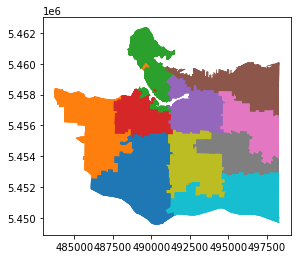

In [3]:
# Plot map of Vancouver based on geometry shapes in data
transit.plot(column='geometry')

<AxesSubplot:>

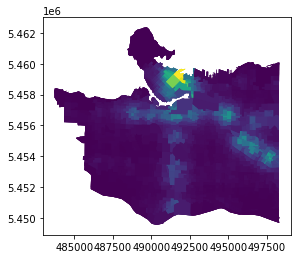

In [4]:
# Transit quality needs cleaning! Graph does not look very informative as is :(
transit.plot(column='transit_qu')

In [5]:
# Preliminary work: Print data as is, prior to any cleaning/analysis
# Sort transit quality from highest score to lowest
transit.sort_values(by='transit_qu', ascending=False)

,id,geo_uid,csdname,csdtype,policy_yea,transit_qu,geometry
5840,167595,59153466,Vancouver,CY,2020,4765.249599,"POLYGON ((492095.223 5459290.725, 492082.463 5..."
2864,164619,59153466,Vancouver,CY,2020,4549.568024,"POLYGON ((492095.223 5459290.725, 492082.463 5..."
5872,167627,59153584,Vancouver,CY,2020,4509.035780,"POLYGON ((492085.822 5459067.742, 492071.152 5..."
1872,163627,59153466,Vancouver,CY,2015,4457.191718,"POLYGON ((492095.223 5459290.725, 492082.463 5..."
880,162635,59153466,Vancouver,CY,2010,4420.839584,"POLYGON ((492095.223 5459290.725, 492082.463 5..."
...,...,...,...,...,...,...,...
517,162272,59150919,Vancouver,CY,2010,1.160075,"POLYGON ((485911.931 5455587.268, 485910.903 5..."
5493,167248,59150953,Vancouver,CY,2020,0.693054,"POLYGON ((486989.341 5453053.085, 487006.918 5..."
2517,164272,59150953,Vancouver,CY,2020,0.568181,"POLYGON ((486989.341 5453053.085, 487006.918 5..."
1525,163280,59150953,Vancouver,CY,2015,0.551531,"POLYGON ((486989.341 5453053.085, 487006.918 5..."


In [6]:
# Min/max scores are quite varied - need to normalize!
transit['transit_qu'].min()

0.545307569824622

In [7]:
transit['transit_qu'].max()

4765.24959913149

In [8]:
transit['transit_qu'].mean()

446.5466410165331

In [9]:
# Determine which regions of Vancouver tend to score higher in transit quality
transit_quality = transit.groupby('geometry').agg({'transit_qu' : 'mean'}).sort_values(by='transit_qu', ascending=False)
transit_quality

,transit_qu
geometry,
"POLYGON ((492095.223 5459290.725, 492082.463 5...",4548.212231
"POLYGON ((492085.822 5459067.742, 492071.152 5...",4275.729390
"POLYGON ((491791.753 5458968.754, 491827.146 5...",3621.232581
"POLYGON ((492412.349 5458751.986, 492410.459 5...",3202.168060
"POLYGON ((492736.965 5458024.229, 492735.252 5...",2889.433939
...,...
"POLYGON ((485906.677 5454843.926, 485906.039 5...",2.409966
"POLYGON ((488407.626 5452158.836, 488427.552 5...",2.318794
"POLYGON ((485056.776 5458146.633, 485053.650 5...",2.074119


In [10]:
# Process dataframes more to leave only quality and area of Vancouver for comparisons
transit_quality = transit_quality.reset_index()
transit_quality = transit_quality[['transit_qu', 'geometry']]
transit_quality

,transit_qu,geometry
0,4548.212231,"POLYGON ((492095.223 5459290.725, 492082.463 5..."
1,4275.729390,"POLYGON ((492085.822 5459067.742, 492071.152 5..."
2,3621.232581,"POLYGON ((491791.753 5458968.754, 491827.146 5..."
3,3202.168060,"POLYGON ((492412.349 5458751.986, 492410.459 5..."
4,2889.433939,"POLYGON ((492736.965 5458024.229, 492735.252 5..."
...,...,...
987,2.409966,"POLYGON ((485906.677 5454843.926, 485906.039 5..."
988,2.318794,"POLYGON ((488407.626 5452158.836, 488427.552 5..."
989,2.074119,"POLYGON ((485056.776 5458146.633, 485053.650 5..."
990,1.242465,"POLYGON ((485911.931 5455587.268, 485910.903 5..."


In [11]:
# 'transit_qu_x' = original transit quality score for the given year
# 'transit_qu_y' = average score for region of Vancouver (geometry) across all years
transit_merged = transit.merge(transit_quality, on=['geometry'])
transit_merged

,id,geo_uid,csdname,csdtype,policy_yea,transit_qu_x,geometry,transit_qu_y
0,161755,59150307,Vancouver,CY,2010,6.232349,"POLYGON ((498310.190 5459815.920, 498309.638 5...",6.405753
1,162747,59150307,Vancouver,CY,2015,6.235359,"POLYGON ((498310.190 5459815.920, 498309.638 5...",6.405753
2,163739,59150307,Vancouver,CY,2020,6.364831,"POLYGON ((498310.190 5459815.920, 498309.638 5...",6.405753
3,166715,59150307,Vancouver,CY,2020,6.790473,"POLYGON ((498310.190 5459815.920, 498309.638 5...",6.405753
4,161756,59150308,Vancouver,CY,2010,86.331070,"POLYGON ((498303.642 5459212.268, 498303.155 5...",91.203891
...,...,...,...,...,...,...,...,...
3963,167705,59154001,Vancouver,CY,2020,2782.914647,"POLYGON ((492175.437 5458706.854, 492275.116 5...",2650.637048
3964,162746,59154002,Vancouver,CY,2010,2025.036037,"POLYGON ((492742.239 5458227.186, 492740.089 5...",2088.511217
3965,163738,59154002,Vancouver,CY,2015,2039.532205,"POLYGON ((492742.239 5458227.186, 492740.089 5...",2088.511217
3966,164730,59154002,Vancouver,CY,2020,2091.366931,"POLYGON ((492742.239 5458227.186, 492740.089 5...",2088.511217


In [12]:
# Data range: 2010, 2015, 2020
# Extract relevant years into separate dataframes
transit_2010 = transit[transit['policy_yea'] == 2010]
transit_2010

,id,geo_uid,csdname,csdtype,policy_yea,transit_qu,geometry
0,161755,59150307,Vancouver,CY,2010,6.232349,"POLYGON ((498310.190 5459815.920, 498309.638 5..."
1,161756,59150308,Vancouver,CY,2010,86.331070,"POLYGON ((498303.642 5459212.268, 498303.155 5..."
2,161757,59150309,Vancouver,CY,2010,125.565256,"POLYGON ((497940.841 5459213.445, 497940.812 5..."
3,161758,59150310,Vancouver,CY,2010,246.654575,"POLYGON ((498298.679 5458709.775, 498298.646 5..."
4,161759,59150311,Vancouver,CY,2010,150.230499,"POLYGON ((497939.463 5458606.665, 498128.359 5..."
...,...,...,...,...,...,...,...
987,162742,59153996,Vancouver,CY,2010,1658.092839,"POLYGON ((491123.035 5459615.245, 491120.710 5..."
988,162743,59153997,Vancouver,CY,2010,1689.441875,"POLYGON ((491676.840 5459587.193, 491605.386 5..."
989,162744,59154000,Vancouver,CY,2010,931.273053,"POLYGON ((492570.830 5458268.003, 492570.838 5..."
990,162745,59154001,Vancouver,CY,2010,2574.731778,"POLYGON ((492175.437 5458706.854, 492275.116 5..."


In [13]:
transit_2010['transit_qu'].mean()

386.06329413897225

In [14]:
transit_2015 = transit[transit['policy_yea'] == 2015]
transit_2015

,id,geo_uid,csdname,csdtype,policy_yea,transit_qu,geometry
992,162747,59150307,Vancouver,CY,2015,6.235359,"POLYGON ((498310.190 5459815.920, 498309.638 5..."
993,162748,59150308,Vancouver,CY,2015,86.345582,"POLYGON ((498303.642 5459212.268, 498303.155 5..."
994,162749,59150309,Vancouver,CY,2015,125.580105,"POLYGON ((497940.841 5459213.445, 497940.812 5..."
995,162750,59150310,Vancouver,CY,2015,246.687007,"POLYGON ((498298.679 5458709.775, 498298.646 5..."
996,162751,59150311,Vancouver,CY,2015,150.264818,"POLYGON ((497939.463 5458606.665, 498128.359 5..."
...,...,...,...,...,...,...,...
1979,163734,59153996,Vancouver,CY,2015,1670.663000,"POLYGON ((491123.035 5459615.245, 491120.710 5..."
1980,163735,59153997,Vancouver,CY,2015,1703.356518,"POLYGON ((491676.840 5459587.193, 491605.386 5..."
1981,163736,59154000,Vancouver,CY,2015,939.046741,"POLYGON ((492570.830 5458268.003, 492570.838 5..."
1982,163737,59154001,Vancouver,CY,2015,2594.808116,"POLYGON ((492175.437 5458706.854, 492275.116 5..."


In [15]:
transit_2015['transit_qu'].mean()

451.2631058943027

In [16]:
transit_2020 = transit[transit['policy_yea'] == 2020]
transit_2020

,id,geo_uid,csdname,csdtype,policy_yea,transit_qu,geometry
1984,163739,59150307,Vancouver,CY,2020,6.364831,"POLYGON ((498310.190 5459815.920, 498309.638 5..."
1985,163740,59150308,Vancouver,CY,2020,90.037548,"POLYGON ((498303.642 5459212.268, 498303.155 5..."
1986,163741,59150309,Vancouver,CY,2020,131.545735,"POLYGON ((497940.841 5459213.445, 497940.812 5..."
1987,163742,59150310,Vancouver,CY,2020,258.257954,"POLYGON ((498298.679 5458709.775, 498298.646 5..."
1988,163743,59150311,Vancouver,CY,2020,157.338626,"POLYGON ((497939.463 5458606.665, 498128.359 5..."
...,...,...,...,...,...,...,...
5947,167702,59153996,Vancouver,CY,2020,1795.115966,"POLYGON ((491123.035 5459615.245, 491120.710 5..."
5948,167703,59153997,Vancouver,CY,2020,1819.825217,"POLYGON ((491676.840 5459587.193, 491605.386 5..."
5949,167704,59154000,Vancouver,CY,2020,1001.975525,"POLYGON ((492570.830 5458268.003, 492570.838 5..."
5950,167705,59154001,Vancouver,CY,2020,2782.914647,"POLYGON ((492175.437 5458706.854, 492275.116 5..."


In [17]:
transit_2020['transit_qu'].mean()

474.4300820164277

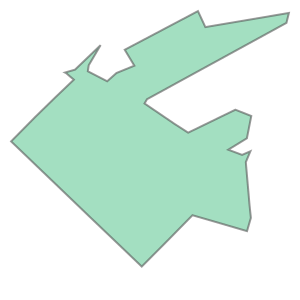

In [18]:
# Extra stuff I was testing out but may want to reference later, feel free to delete anything below though
transit_quality.iloc[0]['geometry']

In [19]:
transit_quality['geometry'].values

<GeometryArray>
[<POLYGON ((492095.223 5459290.725, 492082.463 5459260.35, 492084.65 5459235....>,
 <POLYGON ((492085.822 5459067.742, 492071.152 5459016.192, 492069.748 545901...>,
 <POLYGON ((491791.753 5458968.754, 491827.146 5458931.138, 491860.155 545889...>,
 <POLYGON ((492412.349 5458751.986, 492410.459 5458702.499, 492408.437 545864...>,
 <POLYGON ((492736.965 5458024.229, 492735.252 5457961.993, 492731.424 545782...>,
 <POLYGON ((491426.876 5459318.375, 491396.267 5459288.722, 491317.436 545921...>,
 <POLYGON ((491193.202 5459080.029, 491151.764 5459036.227, 491124.489 545900...>,
 <POLYGON ((492565.369 5458848.643, 492563.98 5458798.945, 492562.434 5458743...>,
 <POLYGON ((497820.937 5453843.188, 497810.768 5453827.149, 497793.679 545380...>,
 <POLYGON ((491930.305 5458824.393, 491896.122 5458789.874, 491817.325 545871...>,
 ...
 <POLYGON ((498310.19 5459815.92, 498309.638 5459772.085, 498309.237 5459715....>,
 <POLYGON ((496921.982 5450444.672, 496921.57 5450434.018, 496920.